# EDA

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following:


After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following:

1. **Stop word analysis** - find the stopwords which is equaly distributed in each label
2. **Tweet sentiment segmetaion with sentiment and product wise** - product analysis
3. **Sentiment distribution** - find the target distribution on bar and pie plot and aslo do statical analysis
4. **Most common words** - find these and create word clouds
5. **Size of vocabulary** - look number of unique words and how fast anyone tweet
6. **Product distribution** - finding the % of positive sentiment of product 

In [1]:
# libraries for visualization
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text 

import re
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
import nltk
import operator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk import word_tokenize, pos_tag


C:\Users\user\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [2]:
noun=pd.read_pickle('noun1.pkl')
noun

,tweet,sentiment
tweet_id,,
1701,define language dialect,1
1851,learn light exception occasion googledoodle,1
2689,inyourface steal show school market expert,2
4525,min browse fuckit illmakeitwork,0
3604,wait,1
...,...,...
3343,plze tammi craziness everything soooooo,1
5334,newtwitter,1
5378,lactation room excuse room bring year,1


In [5]:
data=pd.read_csv('../data/train.csv')
data

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1
7272,2173,We just launched our iPad app at #SXSW! Get al...,1


# Univarent
# 1. Sentiment distribution

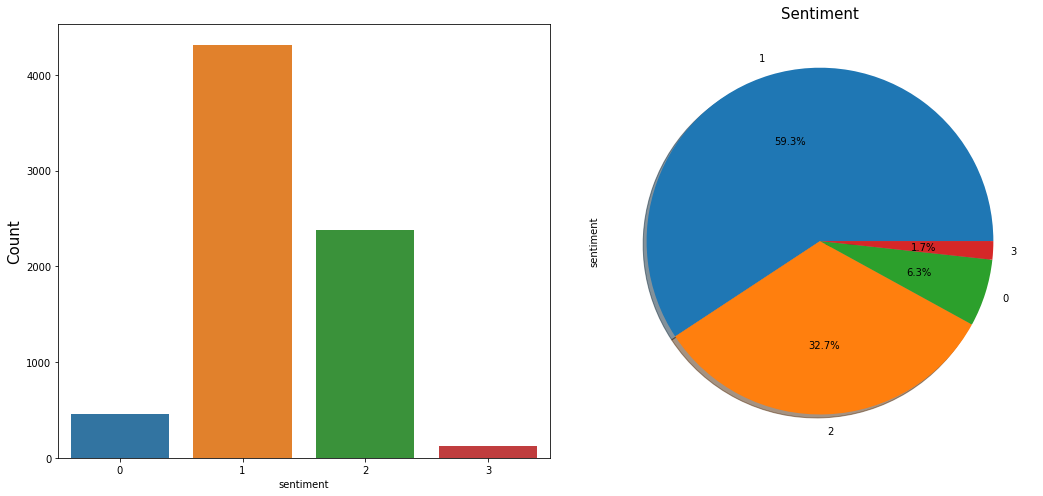

In [6]:
label=[0,1,2,3]
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(data.sentiment)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
data.sentiment.value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('Sentiment',fontsize=15)
plt.tight_layout()
plt.show()

# 💡 finding:
- Here 0: Negative,1: Nutral,2: Posetive,3: can't say and 3 is very less we can assume it nutral
- approx 60% of tweet is nutral,33% of tweet is possetive and 6% is negative , oh! that is great sentiment of people towards the product but as a data analyst we have to analyse why 6% of tweet shows negative sentiments, i will see exact word ression in word cloud analysis...

# 2. whole tweet wordcloud

(-0.5, 799.5, 499.5, -0.5)

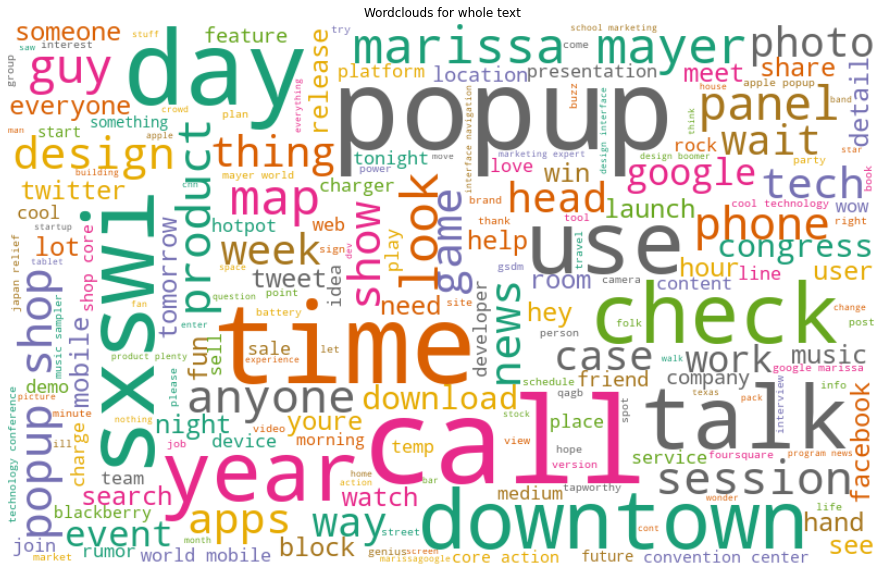

In [7]:
all_words=' '.join(noun['tweet'])

# generate wordcloud object
wordcloud=WordCloud( background_color="white", colormap="Dark2",width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
# plot wordcloud
plt.figure(figsize=(20,10))
plt.title('Wordclouds for whole text')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Hashtag word cloud

(-0.5, 799.5, 499.5, -0.5)

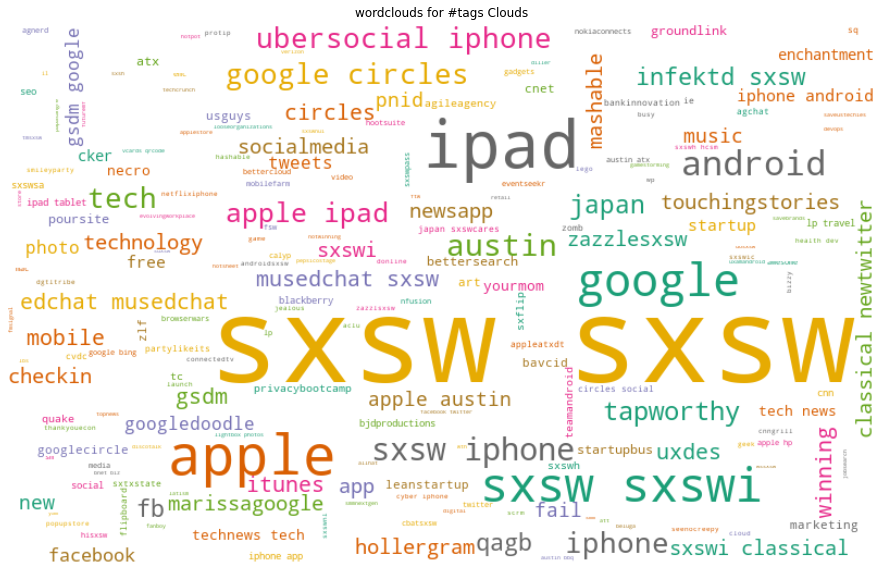

In [8]:
train_n=data
train_n=train_n.dropna()
train_n['#tag']=train_n.tweet.apply(lambda x:','.join(re.findall("#[\w]*", x)))
train_n['#tag']=train_n['#tag'].apply(lambda x:','.join(re.sub('[^a-zA-Z]', ' ', x).lower().split()))
hastag=','.join(train_n['#tag'])
# generate wordcloud object
wordcloud=WordCloud( background_color="white", colormap="Dark2",width=800, height=500, random_state=21, max_font_size=110).generate(hastag)
# plot wordcloud
plt.figure(figsize=(20,10))
plt.title('wordclouds for #tags Clouds')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Bivarent
## `sentiments wordclouds`

In [9]:
label=[0,1,2,3]
new_data={}
for t in label:
    new_data[t]= ' '.join(noun[noun.sentiment.isin([t])].tweet)
new_data

{0: 'min browse fuckit illmakeitwork tweet riseaustin need plugin station day use thing miss ftp cloudapp skype way care business user psych tweet user phone crash dump apps twitterpower imthatgood talk make build netflixiphone couple city block tweet replacement owllove sit floor guy way reason apple existence god enchantment sxswi novelty news apps delegate conference room nothing disgust life hey market head version time life session deciding want site result qagb day heart keyboard gps mess lunch cnngrill view dev trench io sleek report janecek charity nothing everyone room drive decision stop work mullenweg respect honesty awareness lame location location location location cnn kinda embarrass official photo look weird think guess ill lame circle game call alarm mall sunday dongle genius let feel person shoot search result question osmpw flawless plan part design design class someone talk experience nope da verpixelungsrecht house street view math flight clock time flight meet show

In [10]:
#sentiment based DataFrame
train=pd.DataFrame(new_data.values(),index=new_data.keys(),columns=['tweet'])
train.index=['Negative',' Nutral','Posetive','cant_say'] # Here 0: Negative,1: Nutral,2: Posetive,3: can't say
overall_train=train.copy()
overall_train

,tweet
Negative,min browse fuckit illmakeitwork tweet riseaust...
Nutral,define language dialect learn light exception ...
Posetive,inyourface steal show school market expert sam...
cant_say,official stand techie brooklyn wait search pan...


In [11]:
#sentiment based word document matrix
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(train.tweet)
data_dtm = pd.DataFrame(data_cv.toarray(), index=train.index,columns=cv.get_feature_names())
data_stop=data_dtm.T
data_stop

,Negative,Nutral,Posetive,cant_say
aapl,0,3,3,0
aaron,0,1,0,0
abacus,2,0,0,0
abba,0,1,0,0
abc,0,3,0,0
...,...,...,...,...
zone,0,1,0,0
zoom,0,1,2,0
zuckerberg,0,1,0,0
zynga,0,2,0,0


## Top 15 trending words in each sentiments

In [12]:
# Find the top 30 Trending words in each sentiments
top_dict = {}
for c in data_stop.columns:
    top = data_stop[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Negative': [('design', 27),
  ('apps', 20),
  ('time', 19),
  ('day', 17),
  ('year', 16),
  ('product', 15),
  ('thing', 13),
  ('headache', 13),
  ('phone', 13),
  ('battery', 12),
  ('news', 12),
  ('company', 12),
  ('money', 11),
  ('use', 11),
  ('talk', 11),
  ('popup', 9),
  ('japan', 9),
  ('look', 9),
  ('room', 9),
  ('way', 9),
  ('guy', 9),
  ('sxswi', 8),
  ('tweet', 8),
  ('fail', 8),
  ('weekend', 8),
  ('session', 8),
  ('twitter', 8),
  ('apple', 7),
  ('content', 7),
  ('work', 7)],
 ' Nutral': [('popup', 250),
  ('time', 115),
  ('day', 108),
  ('sxswi', 107),
  ('design', 105),
  ('mayer', 99),
  ('talk', 97),
  ('marissa', 93),
  ('music', 89),
  ('map', 82),
  ('check', 82),
  ('downtown', 81),
  ('search', 80),
  ('use', 79),
  ('guy', 78),
  ('news', 77),
  ('google', 76),
  ('product', 72),
  ('game', 70),
  ('location', 70),
  ('panel', 69),
  ('shop', 68),
  ('year', 67),
  ('mobile', 63),
  ('download', 62),
  ('tweet', 62),
  ('event', 60),
  ('apps', 59

In [13]:
# Print the top 15 is in each sentiments
for job_type, top_words in top_dict.items():
    print(job_type)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Negative
design, apps, time, day, year, product, thing, headache, phone, battery, news, company, money, use
---
 Nutral
popup, time, day, sxswi, design, mayer, talk, marissa, music, map, check, downtown, search, use
---
Posetive
popup, time, day, use, sxswi, cool, map, year, mayer, check, look, downtown, case, design
---
cant_say
popup, product, game, design, day, search, time, stock, panel, device, room, fight, battery, tweet
---


💡 Insight: 
- At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them     have very little meaning and could be added to a stop words list, so let's do just that.

In [14]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each job_type
words = []
for sentiment in data_stop.columns:
    top = [word for (word, count) in top_dict[sentiment]]
    for t in top:
        words.append(t)
add_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
add_stop_words

['design', 'time', 'day', 'popup', 'sxswi', 'tweet']

In [15]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

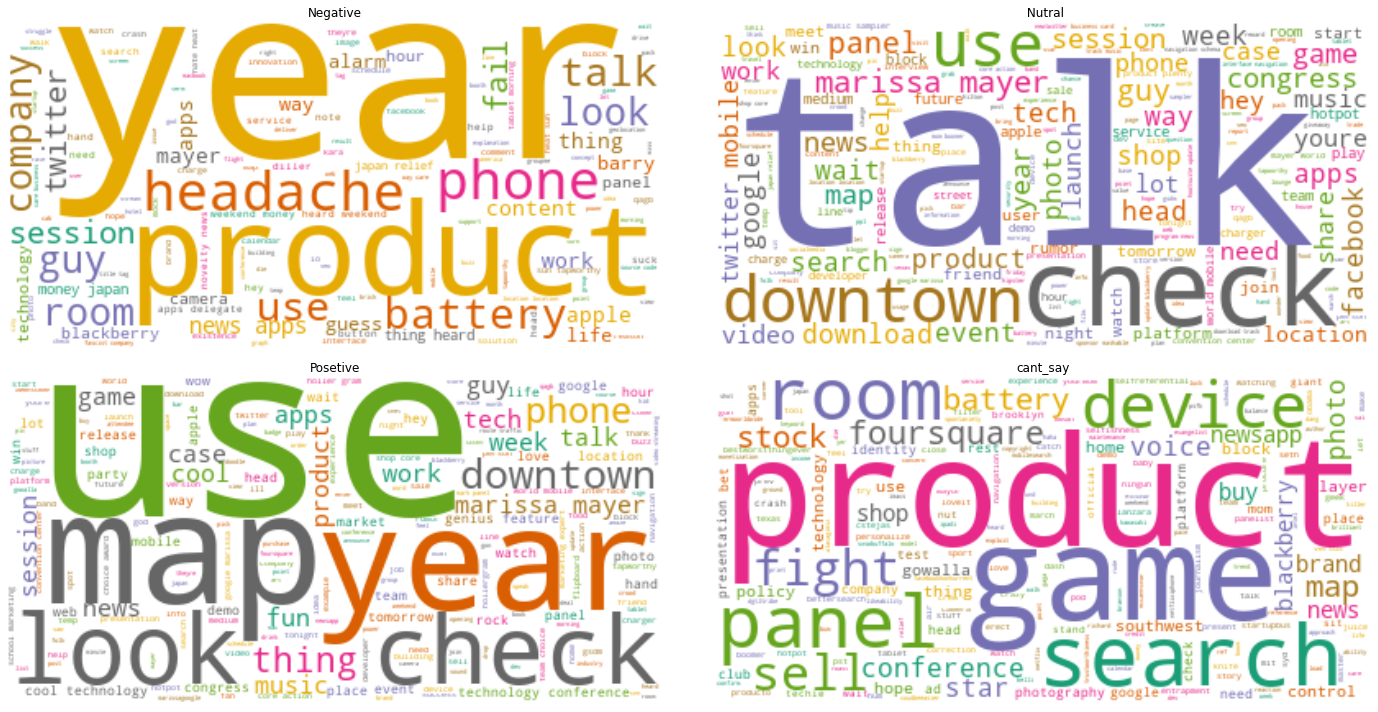

In [16]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 10]

# Create subplots for each sentiment
for index, sentiments in enumerate(overall_train.index):
    wc.generate(overall_train.tweet.loc[sentiments])
    
    plt.subplot(2, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(sentiments)
plt.tight_layout()    
plt.show()

# products analysis and their behaviour pattern with sentiments

 **`Apple products`**
 * Hard products:
  - Iphone,Ipad,Ipod
 * Soft products:
  - Itunes,Apple apps store
  
**`Apple Compatitor`**
  * Hard Products:
   - blackberry,Android phone
  * soft product:
   - Google app store
   

In [17]:
noun.tweet=noun.tweet.apply(lambda x:''.join([row for row in x if row not in add_stop_words]))
noun.sentiment=noun.sentiment.replace(3,1)#'can't' say is very few tweet and its not leadinng to anything then we can assume that nutral

## Apple Products

In [18]:
train=noun.copy()
hard_products={}
Product_list = ['ipad', 'iphone','ipod','apps','popup']
for pList in Product_list:
    for t in range(4):
        if (t == 0) & (pList == 'ipad') :
            hard_products['ipad_Negative']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipad')].tweet)
        elif (t == 1) & (pList == 'ipad') :
            hard_products['ipad_Neutral']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipad')].tweet)
        elif (t == 2) & (pList == 'ipad') :
            hard_products['ipad_Positive']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipad')].tweet)
      
        if (t == 0) & (pList == 'iphone') :
            hard_products['iphone_Negative']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('iphone')].tweet)
        elif (t == 1) & (pList == 'iphone') :
            hard_products['iphone_Neutral']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('iphone')].tweet)
        elif (t == 2) & (pList == 'iphone') :
            hard_products['iphone_Positive']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('iphone')].tweet)
       
        if (t == 0) & (pList == 'ipod') :
            hard_products['ipod_Negative']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipod')].tweet)
        elif (t == 1) & (pList == 'ipod') :
            hard_products['ipod_Neutral']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipod')].tweet)
        elif (t == 2) & (pList == 'ipod') :
            hard_products['ipod_Positive']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipod')].tweet)
        if (t == 0) & (pList == 'apps') :
            hard_products['apps_Negative']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('apps')].tweet)
        elif (t == 1) & (pList == 'apps') :
            hard_products['apps_Neutral']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('apps')].tweet)
        elif (t == 2) & (pList == 'apps') :
            hard_products['apps_Positive']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('apps')].tweet)
        elif (t == 0)&(pList == 'popup'):
            new_data['Apple_Store_Negative']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        elif (t == 1) &(pList == 'popup') :
            new_data['Apple_Store_Neutral']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        elif (t == 2)&(pList == 'popup'):
            new_data['Apple_Store_Positive']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        
       

In [19]:
hard_stop=stop_words.union(set(['ipad', 'iphone', 'sxsw', 'ipod','apps','pps','popup']))
hard_products


{'ipad_Negative': 'pocket hotel usability ipadiphone hereforwork nottheipad course texas understand concept pickmeupanipad',
 'ipad_Neutral': 'friend download sxswgo iphoneipad mistake iphoneipad charger laptopipad participate popup gonnagetanipad wipad laport popup tap ipadtoday ipadi alacagimiz yer belli popup shop day jaloux ipadlook school bus day school behaviour diff lot phone call use ipadlaptop internet behaviour diff lot phone call use ipadlaptop internet watch ipadmade movie temp sxswipad watch ipadmade movie caniexpenseanipad today session print design future momipad',
 'ipad_Positive': 'yeah saysshewithoutanipad platform day everyone iphoneipad waterenergy bar smart phone camera map rainjacket laptopipad playeripod earplug josh clark session ipadtablet development device tapworthy ipadperson ratio ipadiphone youll appreciate design charge dayweekend iphoneipad see photo iwantacameraonmyipad day jaloux ipadlook school bus day school gonnagetanipad fun watch ipadmadness popup

In [20]:
train_hard=pd.DataFrame(hard_products.values(),index=hard_products.keys(),columns=['tweet'])
train_hard.tweet=train_hard.tweet.apply(lambda x:''.join([row for row in x if row not in hard_stop]))
train_hard

,tweet
ipad_Negative,pocket hotel usblty pdphone hereforwork notthe...
ipad_Neutral,frend downlod sxswgo phonepd mstke phonepd chr...
ipad_Positive,yeh sysshewthoutnpd pltform dy everyone phonep...
iphone_Negative,tlk mke buld netflxphone pocket hotel usblty p...
iphone_Neutral,pth photo phoneogrphy moblephotogrphy frend do...
iphone_Positive,tm soos nstrument jw drop phonew controller lo...
ipod_Negative,
ipod_Neutral,engge flter phonepod twtter youkdshvefun exper...
ipod_Positive,wterenergy br smrt phone cmer mp rnjcket lptop...
apps_Negative,tweet user phone crsh dump pps twtterpower mth...


In [21]:
train_hard=train_hard.drop('ipod_Negative')

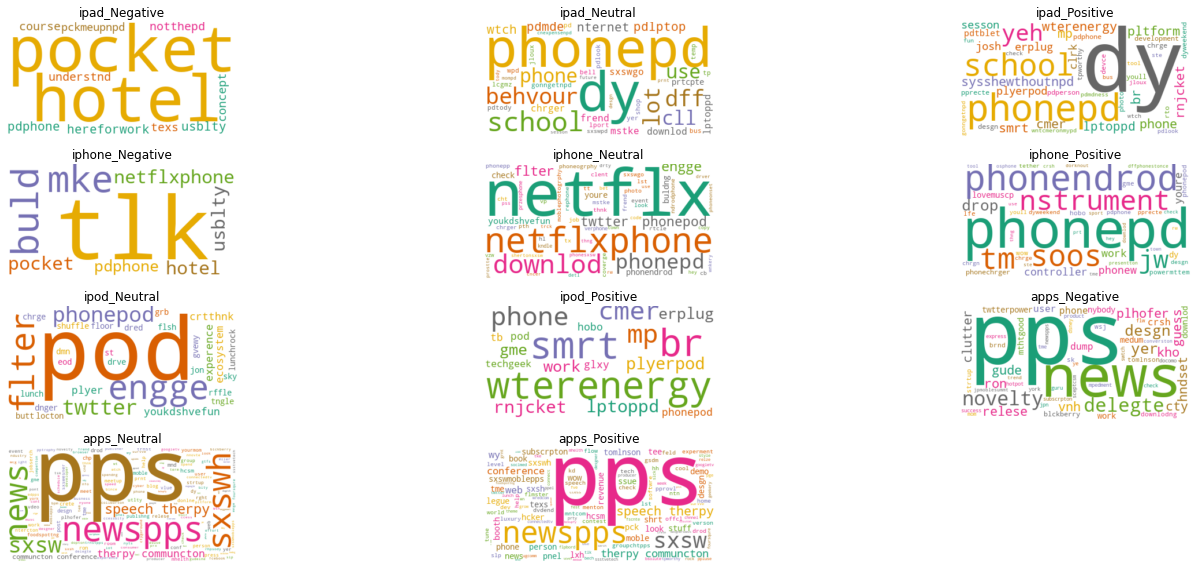

In [22]:
try:

    wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
                   max_font_size=150, random_state=42)
    # Reset the output dimensions
    plt.rcParams['figure.figsize'] = [20, 10]

    # Create subplots for each sentiment
    for index, sentiments in enumerate(train_hard.index):
        wc.generate(train_hard.tweet.loc[sentiments])

        plt.subplot(5, 3, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(sentiments)
    plt.tight_layout()    
    plt.show()
except: 'ValueError '

In [23]:
hard_posetive=data[data.sentiment.isin([0,2])]
hard_posetive.tweet=hard_posetive.tweet.str.lower()
hard_n={}
for i in Product_list:
    vailue=hard_posetive[hard_posetive.sentiment.isin([0])].tweet.str.contains(i).value_counts()
    hard_n[i]=vailue[1]
    
hard_p={}
for i in Product_list:
    vailue=hard_posetive[hard_posetive.sentiment.isin([2])].tweet.str.contains(i).value_counts()
    hard_p[i]=vailue[1]    

In [24]:
posetive=pd.DataFrame(hard_p.values(),index=hard_n.keys(),columns=['P'])
negative=pd.DataFrame(hard_n.values(),index=hard_n.keys(),columns=['N'])
product=pd.concat([posetive,negative],axis=1).applymap(lambda x: (x/len(data))*100)
product.columns=['P%','N%']
product['Total%']=product['P%']+product['N%']
round(product,2)

,P%,N%,Total%
ipad,13.12,2.13,15.25
iphone,6.13,1.77,7.90
ipod,0.10,0.01,0.11
apps,1.02,0.37,1.39
popup,0.89,0.04,0.93


In [25]:
# comparission the product only posetive and negative sentiment
product['p%']=(product['P%']/product['Total%'])*100
product['n%']=(product['N%']/product['Total%'])*100
round(product[['p%','n%']],2)

,p%,n%
ipad,86.02,13.98
iphone,77.57,22.43
ipod,87.50,12.50
apps,73.27,26.73
popup,95.59,4.41


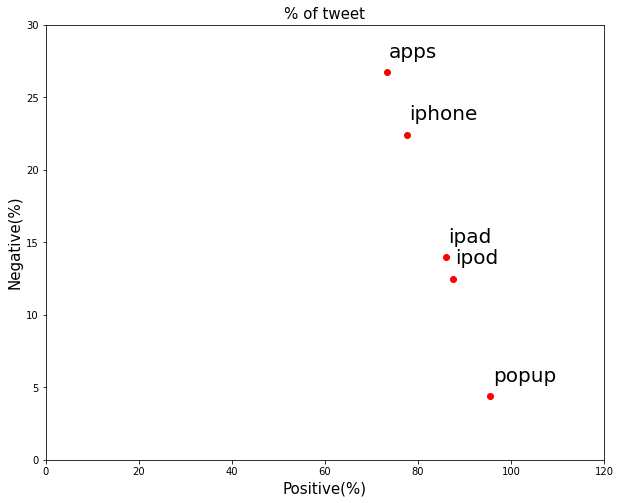

In [28]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, prod in enumerate(product.index):
    x = product['p%'].loc[prod]
    y =product["n%"].loc[prod]
    plt.scatter(x, y, color='red')
    plt.text(x+0.5, y+1, Product_list[i], fontsize=20)
    plt.ylim(0, 30) 
    plt.xlim(0, 120)
plt.title('% of tweet', fontsize=15)
plt.xlabel('Positive(%)', fontsize=15)
plt.ylabel('Negative(%)', fontsize=15)
plt.show()

## Apple Stores

In [252]:
new_data1={}
for t in range(3):
        
        if (t == 0):
            new_data1['Apple_Store_Negative']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        elif (t == 1) :
            new_data1['Apple_Store_Neutral']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        elif (t == 2):
            new_data1['Apple_Store_Positive']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        
    

In [253]:
new_data

{0: 'min browse fuckit illmakeitwork tweet riseaustin need plugin station day use thing miss ftp cloudapp skype way care business user psych tweet user phone crash dump apps twitterpower imthatgood talk make build netflixiphone couple city block tweet replacement owllove sit floor guy way reason apple existence god enchantment sxswi novelty news apps delegate conference room nothing disgust life hey market head version time life session deciding want site result qagb day heart keyboard gps mess lunch cnngrill view dev trench io sleek report janecek charity nothing everyone room drive decision stop work mullenweg respect honesty awareness lame location location location location cnn kinda embarrass official photo look weird think guess ill lame circle game call alarm mall sunday dongle genius let feel person shoot search result question osmpw flawless plan part design design class someone talk experience nope da verpixelungsrecht house street view math flight clock time flight meet show

In [254]:
pop_train=pd.DataFrame(new_data1.values(),index=new_data1.keys(),columns=['tweet'])
pop_train

,tweet
Apple_Store_Negative,move popup shop core action popup shop popup g...
Apple_Store_Neutral,move popup shop core action popup shop popup g...
Apple_Store_Positive,move popup shop core action popup shop popup g...


In [242]:
noun

,tweet,sentiment
tweet_id,,
1701,define language dialect,1
1851,learn light exception occasion googledoodle,1
2689,inyourface steal show school market expert,2
4525,min browse fuckit illmakeitwork,0
3604,wait,1
...,...,...
3343,plze tammi craziness everything soooooo,1
5334,newtwitter,1
5378,lactation room excuse room bring year,1
